# Flight Price Prediction

This is project is about predicting the price of a flight based on the features of the flight. We are going to use a dataset from `/data` and train a model to predict the price of a flight.

## 1. Data Analysis (EDA)
### 1.1 Form Analysis

In [1]:
import pandas as pd

df = pd.read_csv('data/flight_dataset.csv')

print(f"L'ensemble des données contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

print(f"Les 5 premières lignes du dataset sont : \n{df.head()}")

print(f"Les 5 dernières lignes du dataset sont : \n{df.tail()}")

print(f"Les colonnes du dataset sont : \n{df.columns}")

L'ensemble des données contient 10683 lignes et 14 colonnes
Les 5 premières lignes du dataset sont : 
       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi            0   3897    24      3  2019   
1    Air India   Kolkata    Banglore            2   7662     1      5  2019   
2  Jet Airways     Delhi      Cochin            2  13882     9      6  2019   
3       IndiGo   Kolkata    Banglore            1   6218    12      5  2019   
4       IndiGo  Banglore   New Delhi            1  13302     1      3  2019   

   Dep_hours  Dep_min  Arrival_hours  Arrival_min  Duration_hours  \
0         22       20              1           10               2   
1          5       50             13           15               7   
2          9       25              4           25              19   
3         18        5             23           30               5   
4         16       50             21           35               4   

   Durat

We can see here that the format of the date is separated by columns with the number of the day, month and year. The dataset has 3 categorical variables : `Airline`, `Source` and `Destination`. The remaining variables are *numerical*.

In [2]:
print(f"The unique values of the column 'Airline' are : {df['Airline'].unique()}")

print(f"The unique values of the column 'Source' are : {df['Source'].unique()}")

print(f"The unique values of the column 'Destination' are : {df['Destination'].unique()}")

The unique values of the column 'Airline' are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The unique values of the column 'Source' are : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
The unique values of the column 'Destination' are : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


We converted the duration in minutes and we created a new column with the total duration in minutes. All categorical variables are converted into dummy variables with the One Hot Encoding. The dataset is pretty clean and doesn't have a lot of missing values or outliers.

### 1.2 Content Analysis

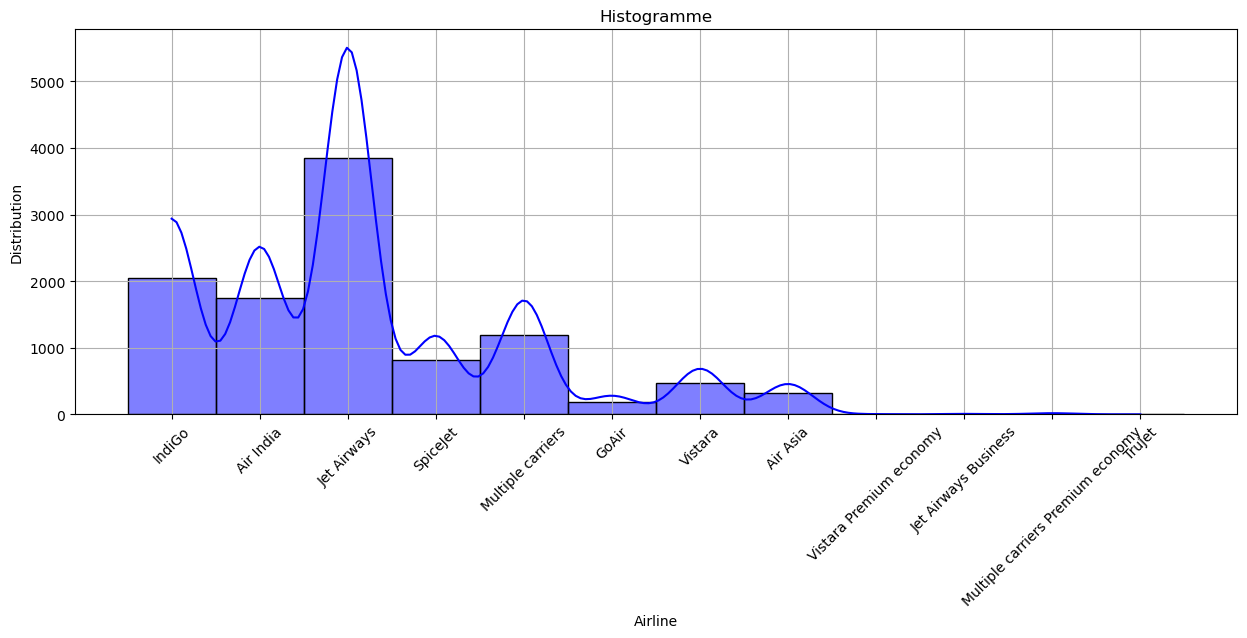

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.histplot(df["Airline"], kde=True, color="blue")
plt.title("Histogramme")
plt.xlabel("Airline")
plt.ylabel("Distribution")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


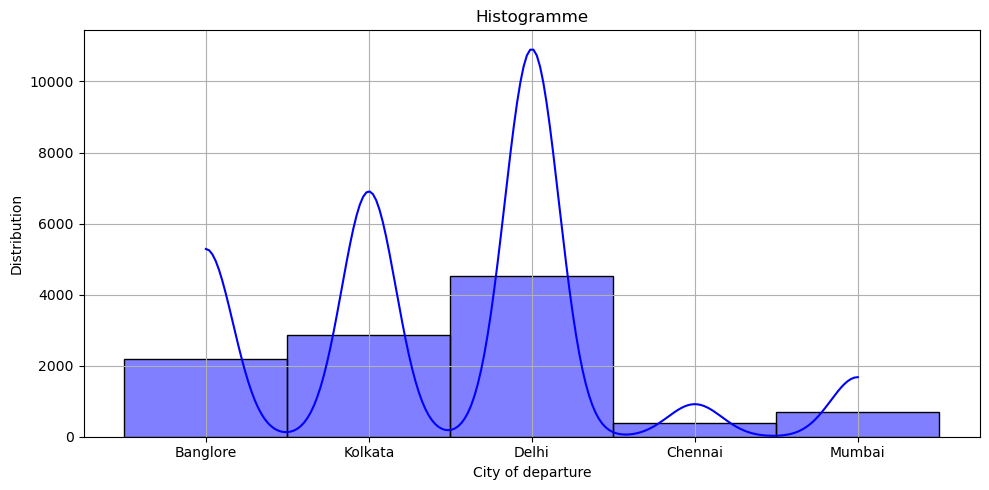

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Source"], kde=True, color="blue")
plt.title("Histogramme")
plt.xlabel("City of departure")
plt.ylabel("Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

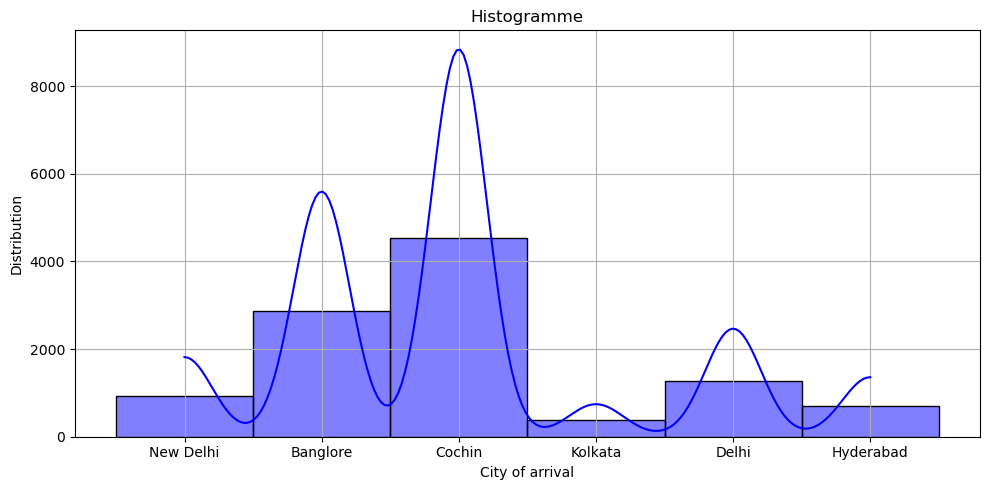

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Destination"], kde=True, color="blue")
plt.title("Histogramme")
plt.xlabel("City of arrival")
plt.ylabel("Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

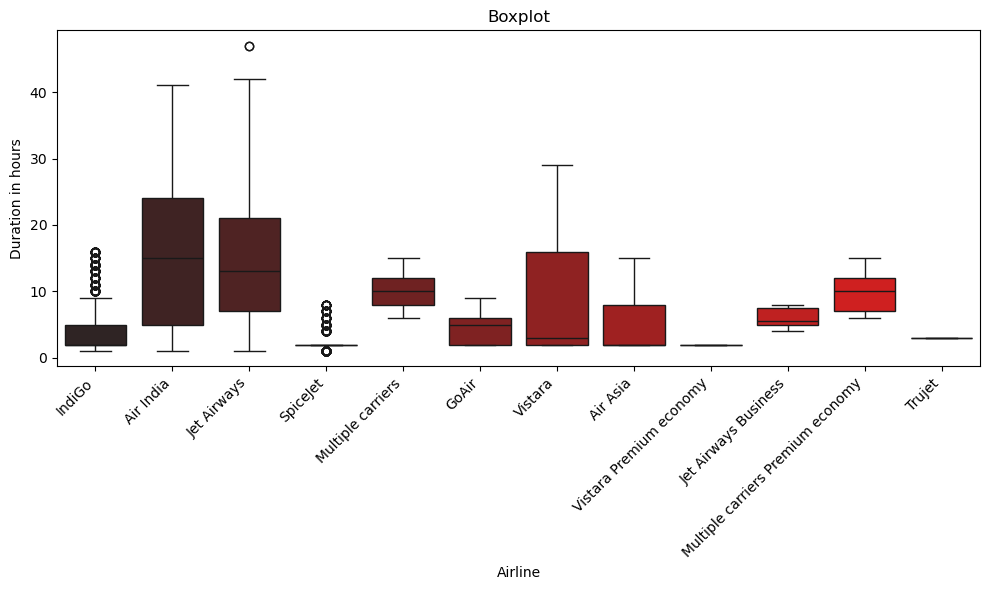

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Duration_hours', data=df, palette='dark:red', hue='Airline', legend=False)
plt.title("Boxplot")
plt.xlabel("Airline")
plt.ylabel("Duration in hours")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

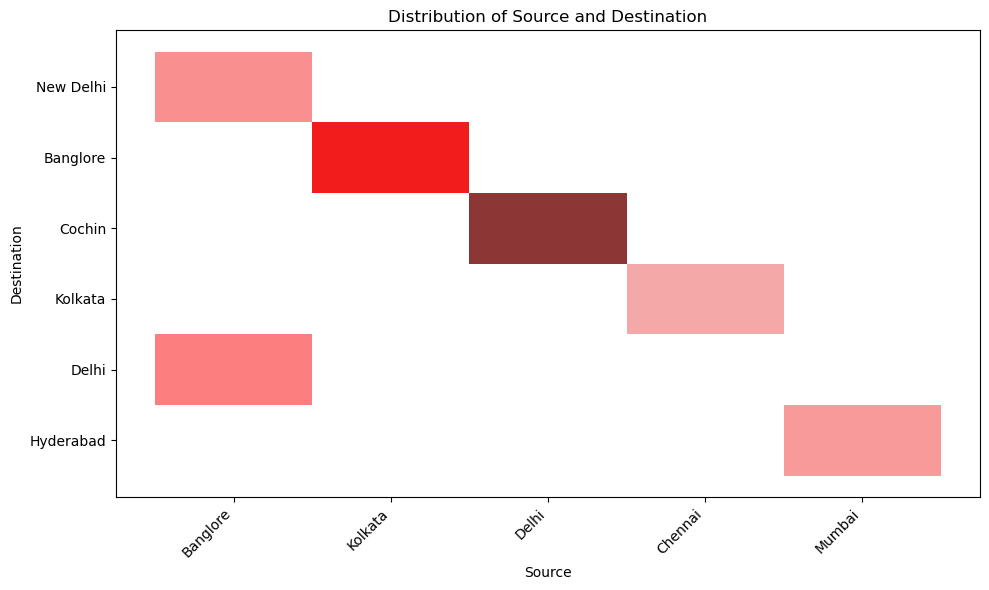

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Source', y="Destination", data=df, color="red")
plt.title("Distribution of Source and Destination")
plt.xlabel("Source")
plt.ylabel("Destination")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
print(f"The average of stop is {df['Total_Stops'].mean().round(2)}")
print(f"The median of stop is {df['Total_Stops'].median()}")
print(f"The minimum of stop is {df['Total_Stops'].min()}")
print(f"The maximum of stop is {df['Total_Stops'].max()}")

print("--------------------------------")

print(f"The average of price is {df['Price'].mean().round(2)}")
print(f"The median of price is {df['Price'].median()}")
print(f"The minimum of price is {df['Price'].min()}")
print(f"The maximum of price is {df['Price'].max()}")

print("--------------------------------")

print(f"The average of duration in hours is {df['Duration_hours'].mean().round(2)}")
print(f"The median of duration in hours is {df['Duration_hours'].median()}")
print(f"The minimum of duration in hours is {df['Duration_hours'].min()}")
print(f"The maximum of duration in hours is {df['Duration_hours'].max()}")


The average of stop is 0.82
The median of stop is 1.0
The minimum of stop is 0
The maximum of stop is 4
--------------------------------
The average of price is 9087.06
The median of price is 8372.0
The minimum of price is 1759
The maximum of price is 79512
--------------------------------
The average of duration in hours is 10.25
The median of duration in hours is 8.0
The minimum of duration in hours is 1
The maximum of duration in hours is 47


### 1.3 Correlation Analysis

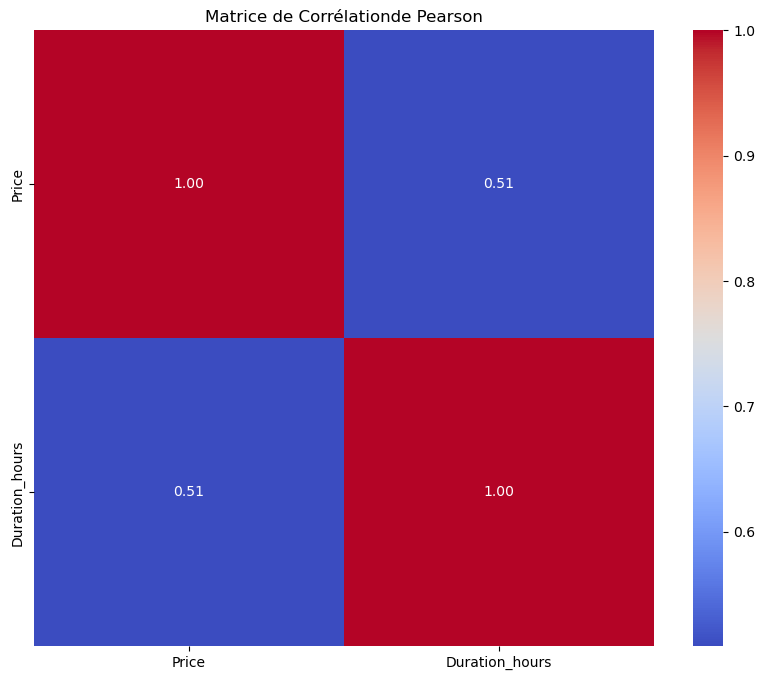

In [9]:
correlation_matrix = df[["Price", "Duration_hours"]].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélationde Pearson")
plt.show()

We can see that the price **(target)** is correlated with the `Duration_total_min` with a correlation coefficient of **0.51**

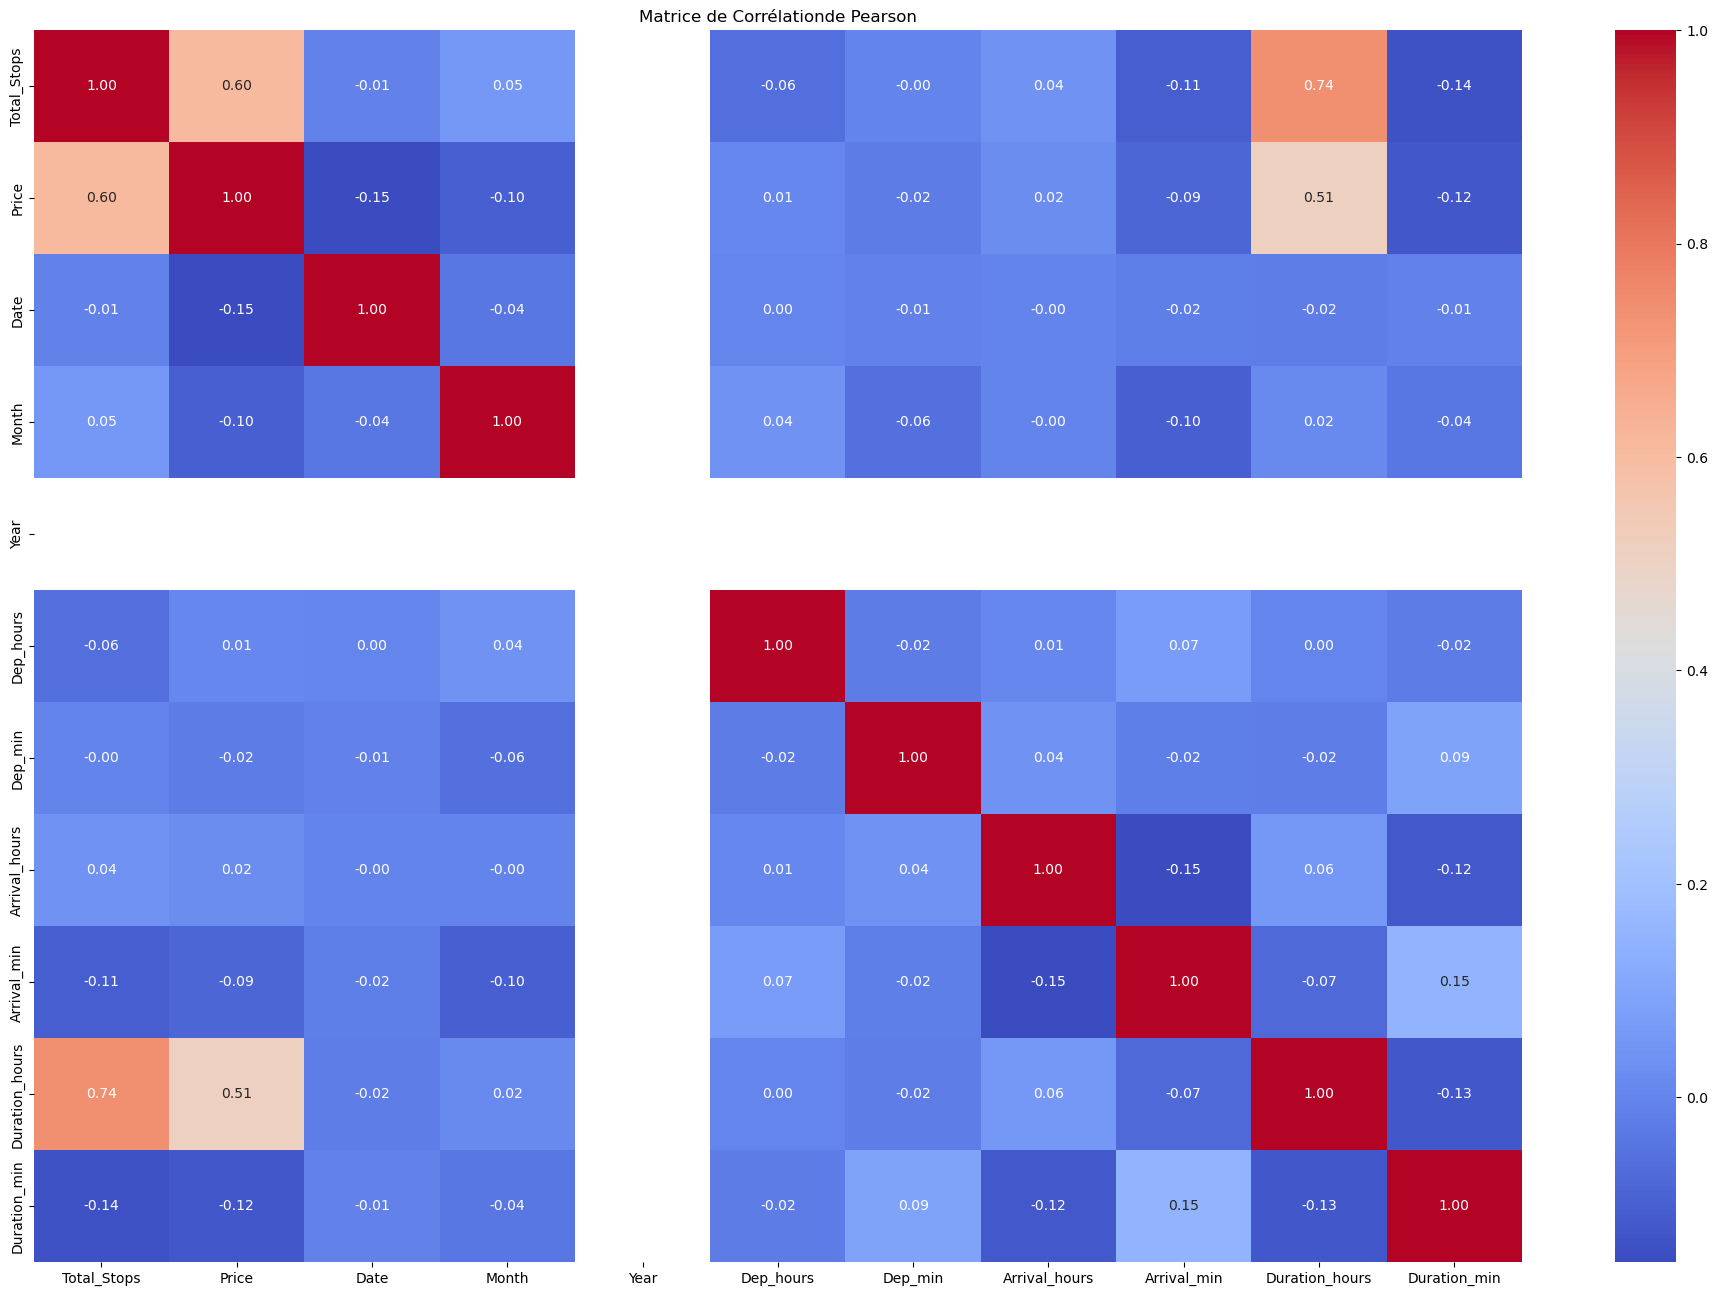

In [10]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélationde Pearson")
plt.show()

There is a correlation between the price and the duration of the flight, the total stops and the duration of the flight and the price.

## 2. Modeling

### 2.1 Data Cleaning

In [11]:
nb_null_values_line = df.isnull().any(axis=1).sum()
print(f"The number of lines with null values is {nb_null_values_line}")

if nb_null_values_line > 0:
    df = df.dropna()
    print(f"Deleting the lines with null values")
    
nb_duplicate_lines = df.duplicated().sum()
print(f"The number of duplicate lines is {nb_duplicate_lines}")

if nb_duplicate_lines > 0:
    df = df.drop_duplicates()
    print(f"Deleting the duplicate lines")

The number of lines with null values is 0
The number of duplicate lines is 222
Deleting the duplicate lines


### 2.2 Feature Engineering

In [12]:
df["Duration_total_min"] = df["Duration_hours"] * 60 + df["Duration_min"]
print(df.head())

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi            0   3897    24      3  2019   
1    Air India   Kolkata    Banglore            2   7662     1      5  2019   
2  Jet Airways     Delhi      Cochin            2  13882     9      6  2019   
3       IndiGo   Kolkata    Banglore            1   6218    12      5  2019   
4       IndiGo  Banglore   New Delhi            1  13302     1      3  2019   

   Dep_hours  Dep_min  Arrival_hours  Arrival_min  Duration_hours  \
0         22       20              1           10               2   
1          5       50             13           15               7   
2          9       25              4           25              19   
3         18        5             23           30               5   
4         16       50             21           35               4   

   Duration_min  Duration_total_min  
0            50                 170  
1            25                 44

Adding a new variable called `Duration_total_min` to the dataframe.

### 2.3 Preprocessing

In [13]:
model_df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)

print(model_df.head())

   Total_Stops  Price  Date  Month  Year  Dep_hours  Dep_min  Arrival_hours  \
0            0   3897    24      3  2019         22       20              1   
1            2   7662     1      5  2019          5       50             13   
2            2  13882     9      6  2019          9       25              4   
3            1   6218    12      5  2019         18        5             23   
4            1  13302     1      3  2019         16       50             21   

   Arrival_min  Duration_hours  ...  Airline_Vistara Premium economy  \
0           10               2  ...                            False   
1           15               7  ...                            False   
2           25              19  ...                            False   
3           30               5  ...                            False   
4           35               4  ...                            False   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0           False         

We have used the **One Hot Encoding** to convert the categorical variables into numerical variables.

### 2.4 Model Selection

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

Separation of features and target

In [15]:
X = model_df.drop(['Price'], axis=1)
y = model_df['Price']

Divide the dataset into training and test sets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardisation of features.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creation of models

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bagging Regressor': BaggingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

results = {}

### 2.5 Training the models

Now we are going to train the models and evaluate them.

We will use the following models:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest
- Bagging Regressor
- SVR

We will use the following metrics:
- MSE
- RMSE
- MAE
- R2 Score

We will use the following dataset:
- X_train
- X_test
- y_train
- y_test

We will use the following scaler:
- StandardScaler

In [19]:
for name, model in models.items():
    print(f"\nTraining the model : {name}")
    
    if name == 'SVR':
        # SVR takes more time, so we use a subset for training
        model.fit(X_train_scaled[:1000], y_train[:1000])
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")



Training the model : Linear Regression
MSE: 8209042.92
RMSE: 2865.14
MAE: 1983.06
R2 Score: 0.5959

Training the model : Ridge Regression
MSE: 8208888.94
RMSE: 2865.12
MAE: 1983.00
R2 Score: 0.5960

Training the model : Lasso Regression
MSE: 8208481.17
RMSE: 2865.04
MAE: 1982.73
R2 Score: 0.5960

Training the model : Random Forest
MSE: 3657937.06
RMSE: 1912.57
MAE: 1172.44
R2 Score: 0.8200

Training the model : Bagging Regressor
MSE: 3638255.49
RMSE: 1907.42
MAE: 1170.69
R2 Score: 0.8209

Training the model : SVR
MSE: 20420740.25
RMSE: 4518.93
MAE: 3566.66
R2 Score: -0.0051


### 2.6 Evaluation of the models

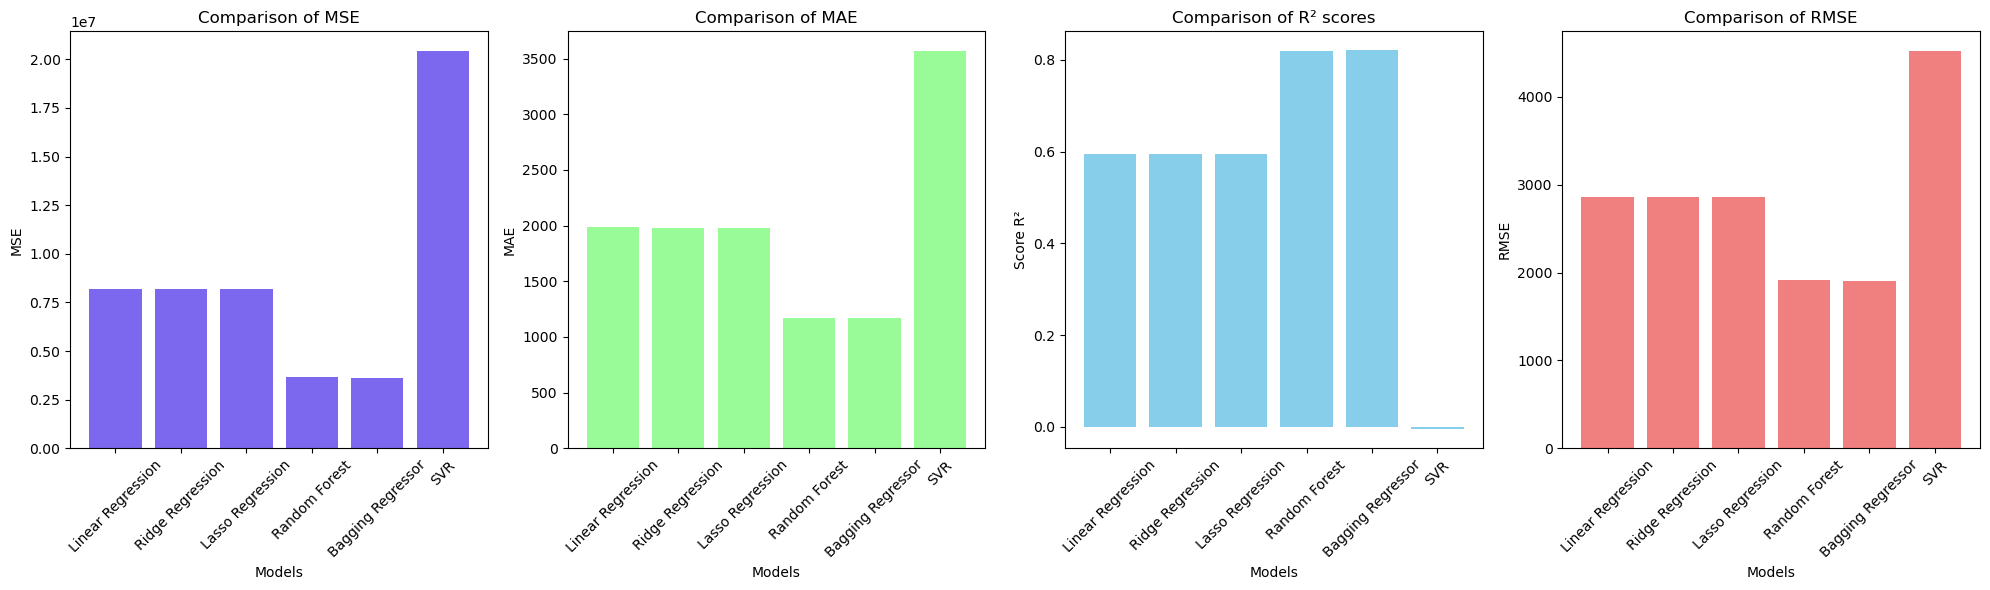


Best model : Bagging Regressor
Score R² : 0.8209
RMSE : 1907.42
MAE : 1170.69


In [20]:
import matplotlib.pyplot as plt

models_names = list(results.keys())
r2_scores = [results[name]['R2'] for name in models_names]
rmse_scores = [results[name]['RMSE'] for name in models_names]
mse_scores = [results[name]['MSE'] for name in models_names]
mae_scores = [results[name]['MAE'] for name in models_names]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

# MSE graph
ax1.bar(models_names, mse_scores, color='mediumslateblue')
ax1.set_title('Comparison of MSE')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)

# MAE graph
ax2.bar(models_names, mae_scores, color='palegreen')
ax2.set_title('Comparison of MAE')
ax2.set_xlabel('Models')
ax2.set_ylabel('MAE')
ax2.tick_params(axis='x', rotation=45)

# R2 scores graph
ax3.bar(models_names, r2_scores, color='skyblue')
ax3.set_title('Comparison of R² scores')
ax3.set_xlabel('Models')
ax3.set_ylabel('Score R²')
ax3.tick_params(axis='x', rotation=45)

# RMSE graph
ax4.bar(models_names, rmse_scores, color='lightcoral')
ax4.set_title('Comparison of RMSE')
ax4.set_xlabel('Models')
ax4.set_ylabel('RMSE')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

best_model = max(results.items(), key=lambda x: x[1]['R2'])
print(f"\nBest model : {best_model[0]}")
print(f"Score R² : {best_model[1]['R2']:.4f}")
print(f"RMSE : {best_model[1]['RMSE']:.2f}")
print(f"MAE : {best_model[1]['MAE']:.2f}")


Here the best model is the **Bagging Regressor**.